In [1]:
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

sys.path.insert(0, os.path.abspath('..'))
from script.functions import *

#### First, we import the data and display it after passing it through the function.

In [2]:
df = load_and_process('../../data/raw/adult.data')
df
#MANAGED THE IMPORT THANK GOD

,Age,Workclass,Education,Marital Status,Occupation,Race,Sex,Hours/Week,Native Country,Yearly Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


#### Next, we describe the data to show the mean surveyed age (38) and the mean work hours of 40/week

In [3]:
df.describe()

,Age,Hours/Week
count,30162.000000,30162.000000
mean,38.437902,40.931238
std,13.134665,11.979984
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


#### Create a profile report for the dataset.

In [5]:
df.to_csv('../../data/processed/processed1.csv')
report = pp.ProfileReport(df).to_file('../../data/processed/report.html')

#### Let's check the relationship between Age and Education

In [4]:
ageEdu = df.loc[:,['Age', 'Education']]
ageEdu

,Age,Education
0,39,Bachelors
1,50,Bachelors
2,38,HS-grad
3,53,11th
4,28,Bachelors
...,...,...
32556,27,Assoc-acdm
32557,40,HS-grad
32558,58,HS-grad
32559,22,HS-grad


### Create countplot for different education levels:
This is to see what education the majority of the people surveyed in this dataset had.
We can clearly see that most of the people only joined the workforce with a HS degree
while others mainly did some college courses or compeleted a full Bachelors

<Figure size 2160x720 with 0 Axes>

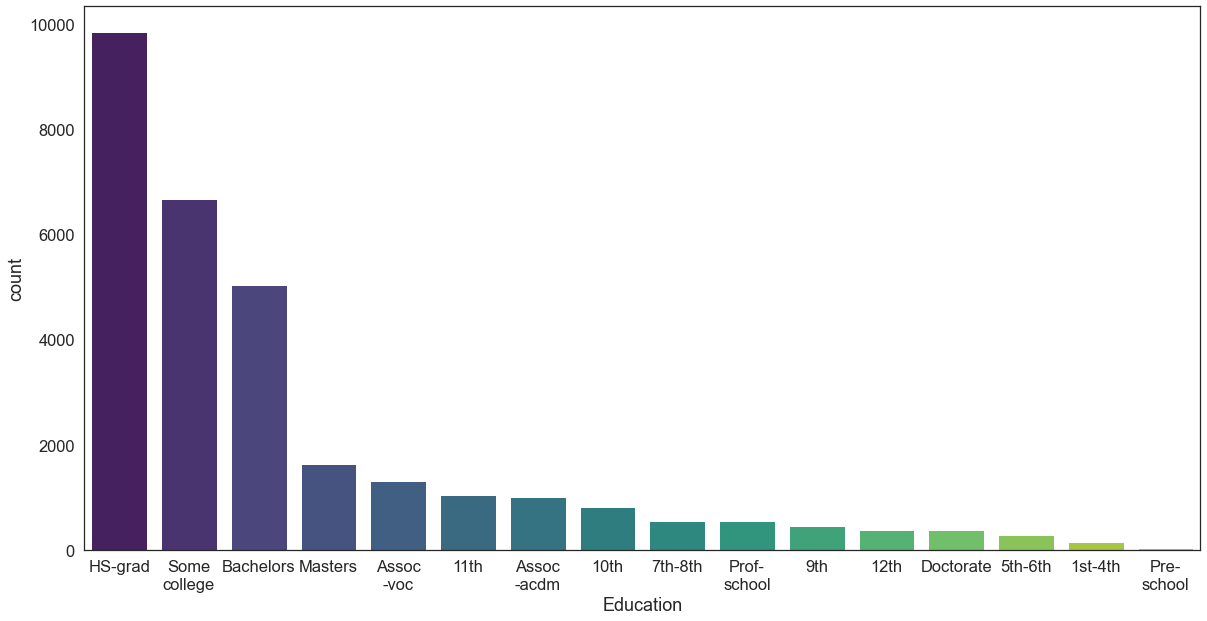

In [12]:
ageEdu.replace({'Some-college': 'Some\ncollege','Prof-school':'Prof-\nschool',
                'Assoc-voc':'Assoc\n-voc','Assoc-acdm':'Assoc\n-acdm',
                'Preschool':'Pre-\nschool'}, inplace = True)
#names didn't fit on graph so I had to change them.
sns.despine()
plt.figure(figsize = (20,10))
sns.set(style = 'white', font_scale = 1.5)
eduCountGraph = sns.countplot(x = 'Education', data = ageEdu, palette = 'viridis', order = ageEdu['Education'].value_counts().index)
eduCountGraph.get_figure().savefig('../../images/eduCount.jpg',dpi = 500)

In [49]:
#Replace all row values in Education with new format.
df.replace({'Some-college': 'Some\ncollege','Prof-school':'Prof-\nschool',
                'Assoc-voc':'Assoc\n-voc','Assoc-acdm':'Assoc\n-acdm',
                'Preschool':'Pre-\nschool'}, inplace = True)
df

,Age,Workclass,Education,Marital Status,Occupation,Race,Sex,Hours/Week,Native Country,Yearly Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc\n-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


## Let's check the relationship of Age vs Earnings:
#### First, we check the count of ages that have >50K earning/year
This shows that the most amount of people with above 50K yearly income are aged 37 - 47
which just shows that this is the age when adults become most settled with a good job

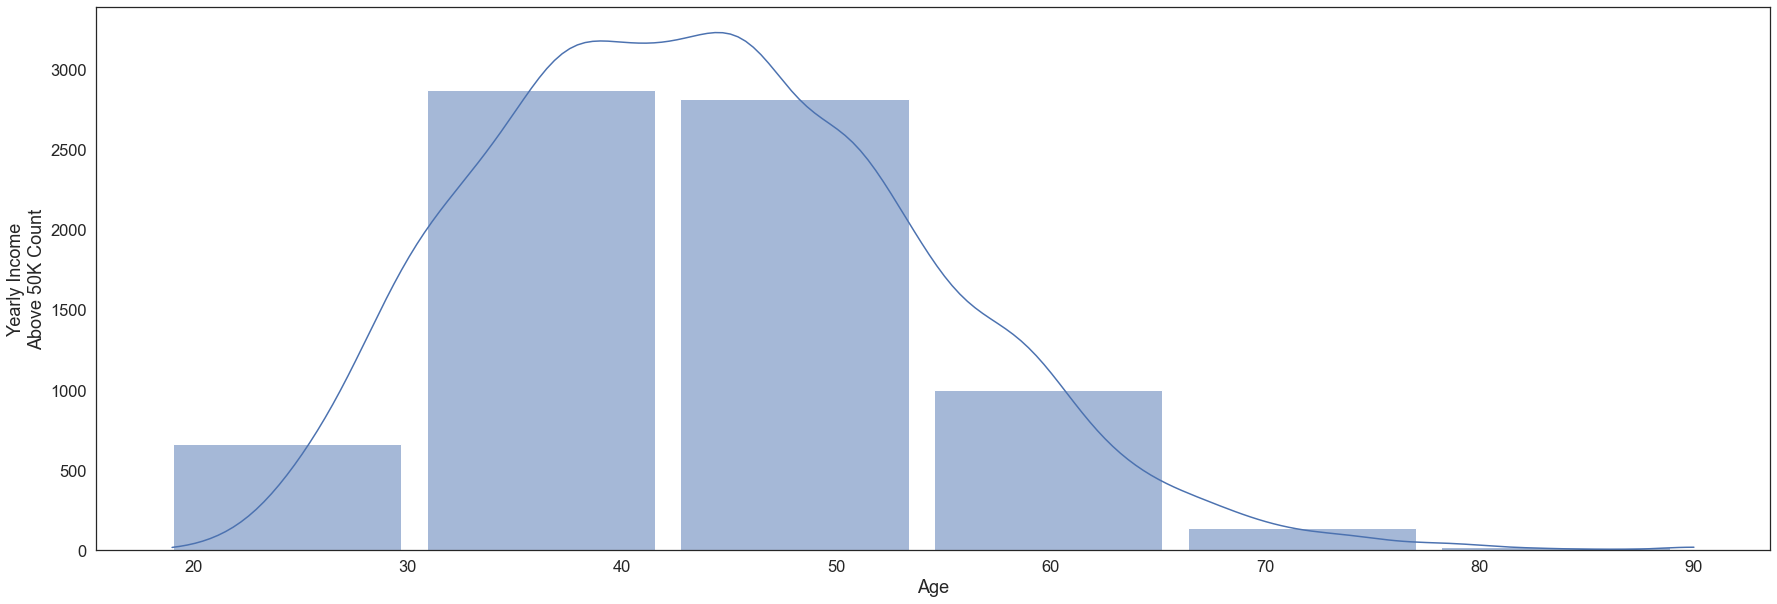

In [10]:
ageEarn = df.loc[:,['Age', 'Yearly Income']]
ageEarnAbove50k = ageEarn.loc[lambda x: x['Yearly Income'] == '>50K']

#We'll check both Ages that have above and below 50K income
sns.set(style = 'white', font_scale = 1.5,rc={'figure.figsize':(30,10)})
ageEarnGraph = sns.histplot(x = 'Age',data = ageEarnAbove50k,shrink = 0.9, bins = 6, kde = True)
ageEarnGraph.set(ylabel = 'Yearly Income\nAbove 50K Count')
ageEarnGraph.get_figure().savefig('../../images/ageEarnAbove50k.jpg', dpi = 500)

#### Next, we check the count of ages with <=50K earning/year
This shows that the most amount of people with below 50K yearly income are aged 19 - 36
which is understandable for young people

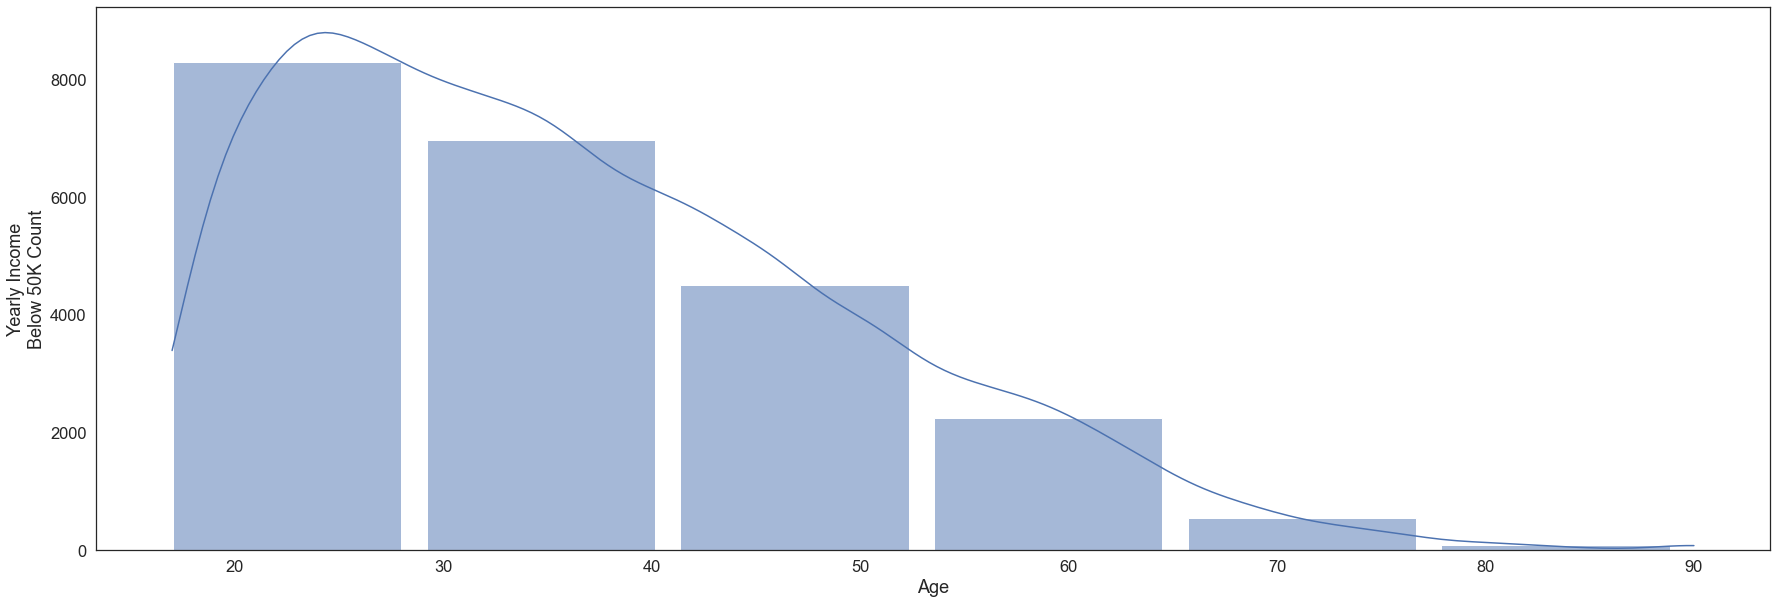

In [13]:
ageEarnBelow50k = ageEarn.loc[lambda x: x['Yearly Income'] == '<=50K']
ageEarnGraph = sns.histplot(x = 'Age', data = ageEarnBelow50k,bins = 6, shrink = 0.9, kde = True)
ageEarnGraph.set(ylabel = 'Yearly Income\nBelow 50K Count')
ageEarnGraph.get_figure().savefig('../../images/ageEarnBelow50k.jpg', dpi = 500)

## Let's make a density plot to see the trends in each graph and where they overlap
#### TL;DR Mo money mo money mo money - as we age..to the peak of 47.
This just shows the immense density of those aged around 40 in the above 50K
group. It also shows that at around age 25 most is where most people make under 50K
then they start to climb the above 50K ladder at the peak age of 40. From
this data it is evident that we make more money as we get older.

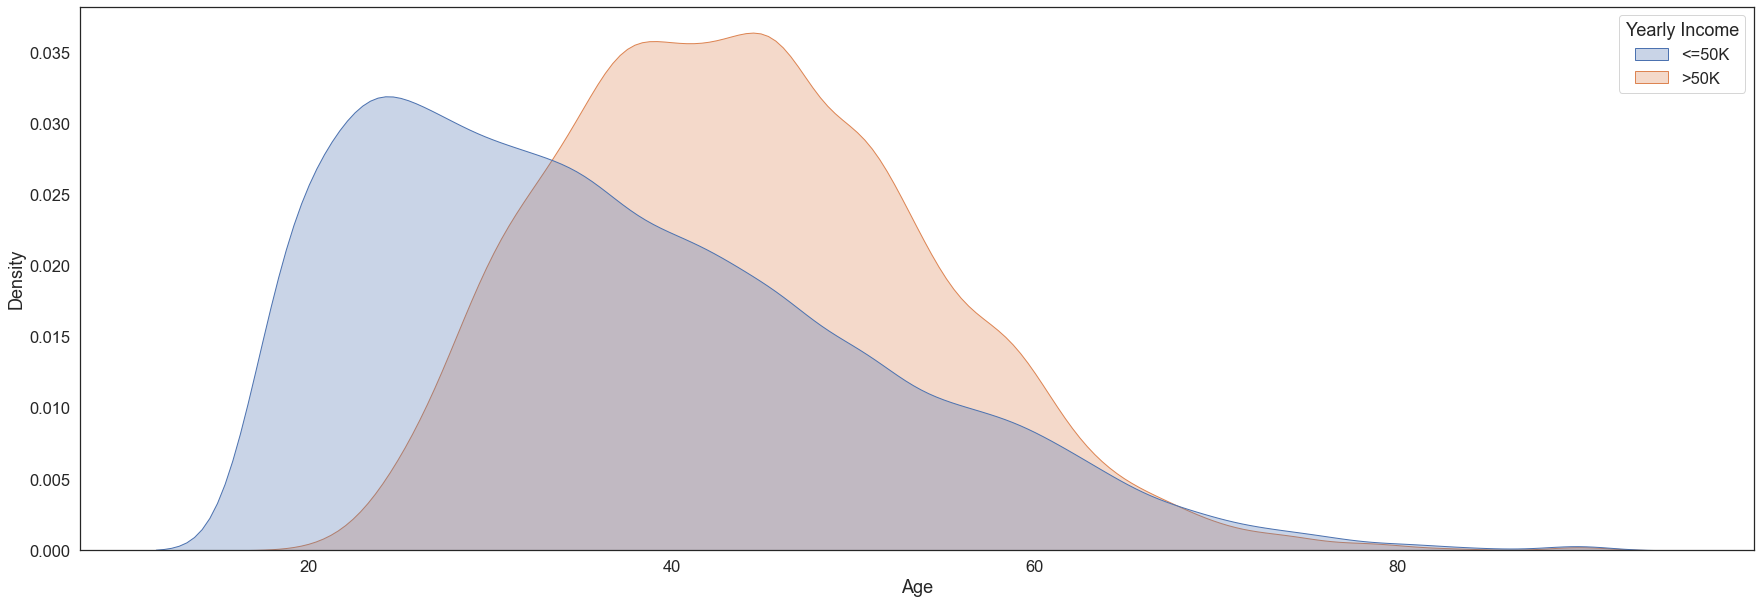

In [21]:
ageEarnDenisty = sns.kdeplot(x = 'Age',hue = 'Yearly Income', data = ageEarn,
                             alpha = 0.3, fill = True, common_norm = False)

# Time to look at research questions.
## RESEARCH QUESTION 1:
### How much of a role does education play into someone's yearly income?
I will conduct this analysis through a count plot of each education category to see which of them has the highest count of >50k/year earners and which have the lowest and the same with <=50k/year earners.
#### TL;DR Bachelor is all you need for a good paying job
**Start with >50K wages**

This data shows that most of the people in the Above50k dataset only have their
Bachelors degree with HS-grad and some college education trailing behind. Of course the data becomes skewed
as we can't directly compare against other educational paths since they are not
in equal numbers.

[Text(0.5, 1.0, 'Education VS Salary (Over 50K) Count'), Text(0, 0.5, 'Count')]

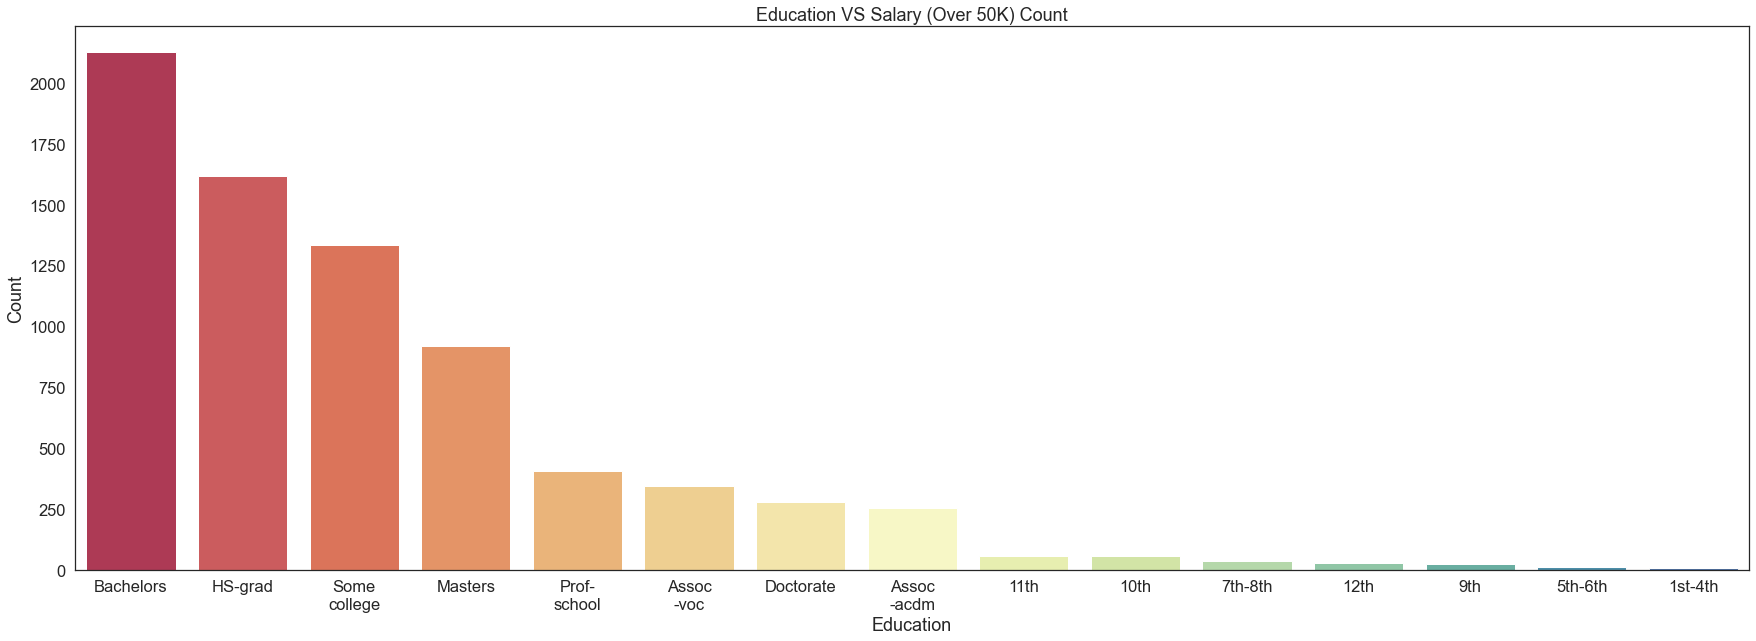

In [33]:
eduWageAbove50k = df.loc[lambda x: x['Yearly Income'] == '>50K']
#Let's make a countplot for that.
eduWageGraph = sns.countplot(x = 'Education', data = eduWageAbove50k,
                             palette = 'Spectral', order = eduWageAbove50k['Education'].value_counts().index)
eduWageGraph.set(title = 'Education VS Salary (Over 50K) Count', ylabel = 'Count')

**Now with Below50k dataset**
#### TL;DR HS grads who don't go to post secondary and finish a degree have lower paying jobs
This data shows that most of the people with jobs paying below 50k/year are the ones
with only a HS-grad education with people that have only done some college courses
as second place. Unless you complete a program at post-secondary or go into trades
after finishing school, you may make less than 50k/year 

<AxesSubplot:xlabel='Education', ylabel='count'>

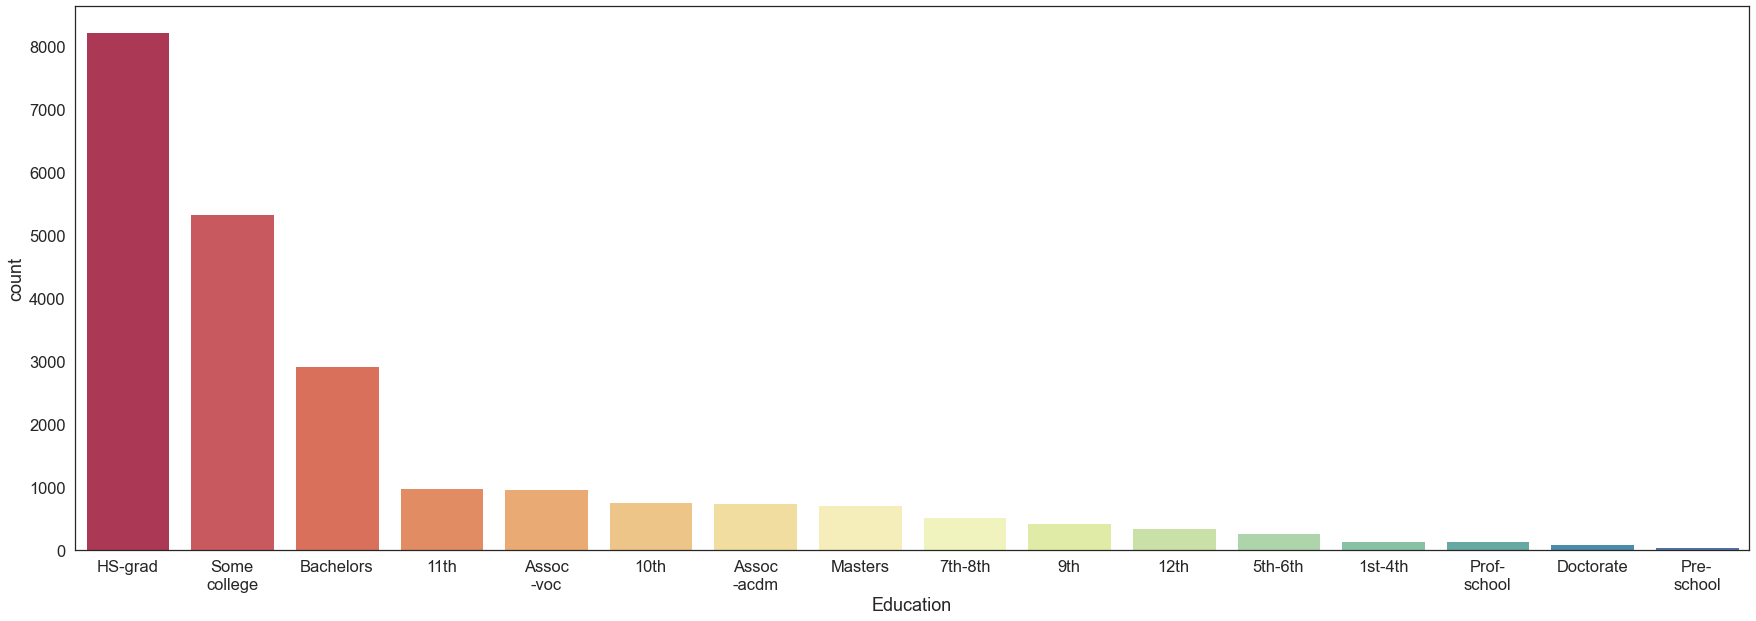

In [25]:
eduWageBelow50k = df.loc[lambda x: x['Yearly Income'] == '<=50K']
#Let's make a countplot for that.
sns.countplot(x = 'Education', data = eduWageBelow50k, order = eduWageBelow50k['Education'].value_counts().index, palette = 'Spectral')

**Since my data is all categorical and a violin, distplot, plot doesn't count occurences of categorical data I am limited to a certain amount of graphs.**
## RESEARCH QUESTION 2:
### Which industries of work pay the most amount of money on average?
To analyze this I will create a count plot of every job category to observe the amount of people earning above or below 50k/year
#### TL;DR Own a suit, managerial and executive have most top earners while trades/clerical industries have most low earners
We can see from this data that no one in armed forces makes above 50K/year
with the Exec/Managerial and Prof-specialty occupations making the majority of
the people with wages above 50K/year

[Text(0.5, 1.0, 'Occupation VS Yearly Income'),
 Text(0, 0.5, 'Count of People with >50K\nEarnings per Occupation')]

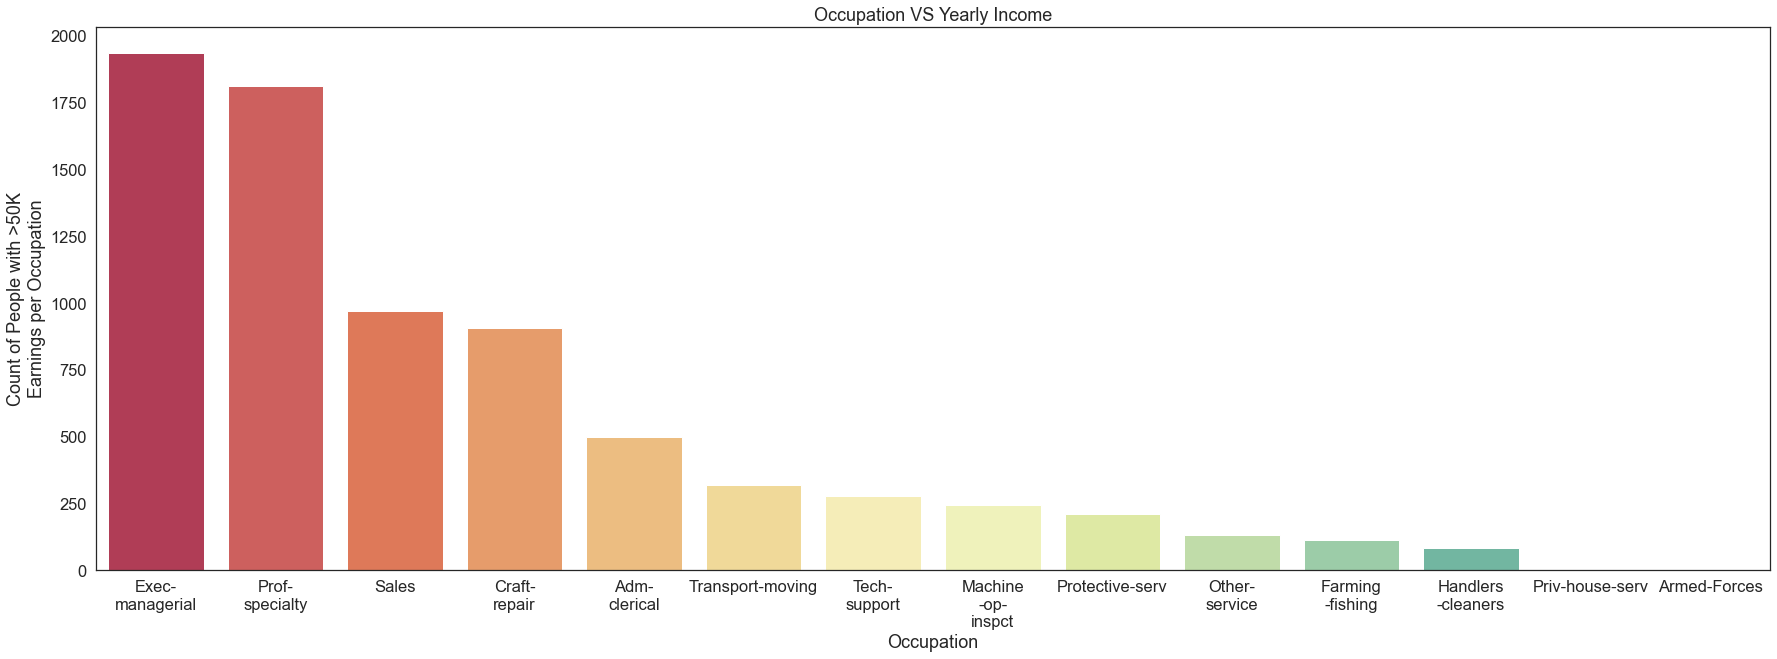

In [36]:
#change row values to fit graph
df.replace({'Adm-clerical':'Adm-\nclerical','Exec-managerial':'Exec-\nmanagerial',
                'Handlers-cleaners':'Handlers\n-cleaners','Tech-support':'Tech-\nsupport',
                'Craft-repair':'Craft-\nrepair','Other-service':'Other-\nservice',
                'Prof-specialty':'Prof-\nspecialty','Machine-op-inspct':'Machine\n-op-\ninspct','Farming-fishing':'Farming\n-fishing'}, inplace = True)
wageOc = df.loc[:,['Occupation', 'Yearly Income']]
wageOcAbove50k = wageOc.loc[lambda x:x['Yearly Income'] == '>50K']
wageOcGraph = sns.countplot(data = wageOcAbove50k, x = 'Occupation', palette = 'Spectral', order = wageOcAbove50k['Occupation'].value_counts().index)
wageOcGraph.set(title = 'Occupation VS Yearly Income', ylabel = 'Count of People with >50K\nEarnings per Occupation')

**Check jobs with below 50k/year earnings**

Now seeing the second half of the data we can observe that no one surveyed worked
in the armed forces. It also shows that the majority of people making below 50K a year
strike a 3 way tie between Adm-clerical, Other-services, and Craft-repair jobs.
Although Exec/managerial jobs make up most of the people who make >50K/year,
they also make up a decent chunk of the people who make less than 50K/year.

[Text(0.5, 1.0, 'Occupation VS Yearly Income'),
 Text(0, 0.5, 'Count of People with <=50K\nEarnings per Occupation')]

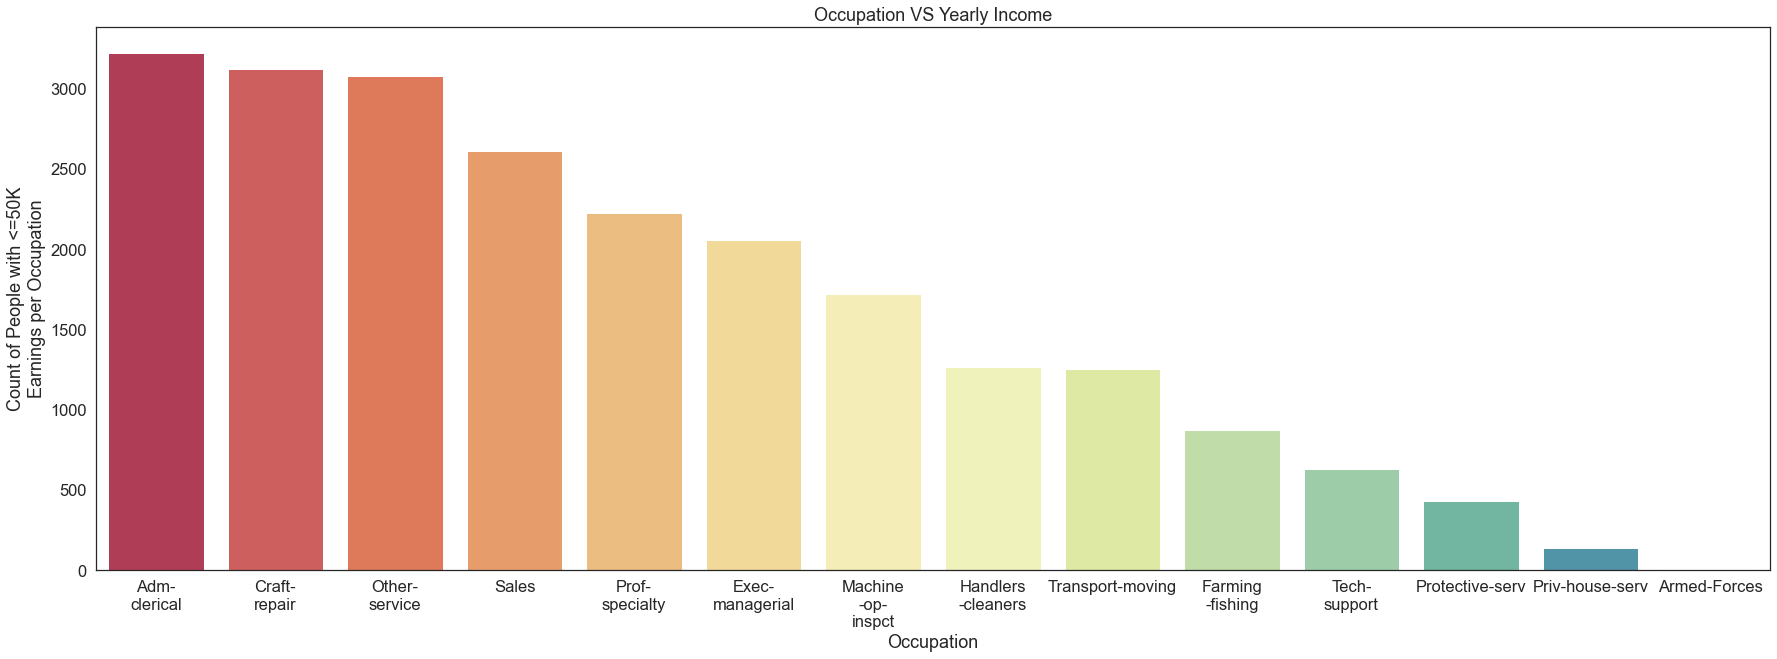

In [37]:
wageOcBelow50k = wageOc.loc[lambda x:x['Yearly Income'] == '<=50K']
wageOcGraph = sns.countplot(data = wageOcBelow50k, x = 'Occupation',palette = 'Spectral', order = wageOcBelow50k['Occupation'].value_counts().index)
wageOcGraph.set(title = 'Occupation VS Yearly Income', ylabel = 'Count of People with <=50K\nEarnings per Occupation')

## RESEARCH QUESTION 3:
### What is the most common occupation surveyed in this dataset?
I will conduct this analysis through a count plot of each occupation.
### Results:
In an interesting 3 way tie, we have prof-specialty, craft-repair, and exec-managerial occupations with the highest counts although not far behind are adm-clerical, sales, and other-services. It is super interesting to see that execute/managerial roles are so prevelant in this dataset as it can be thought by some as a difficult role to obtain. The occupations in this category are also the first place holder for most number of wages above 50k/year.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

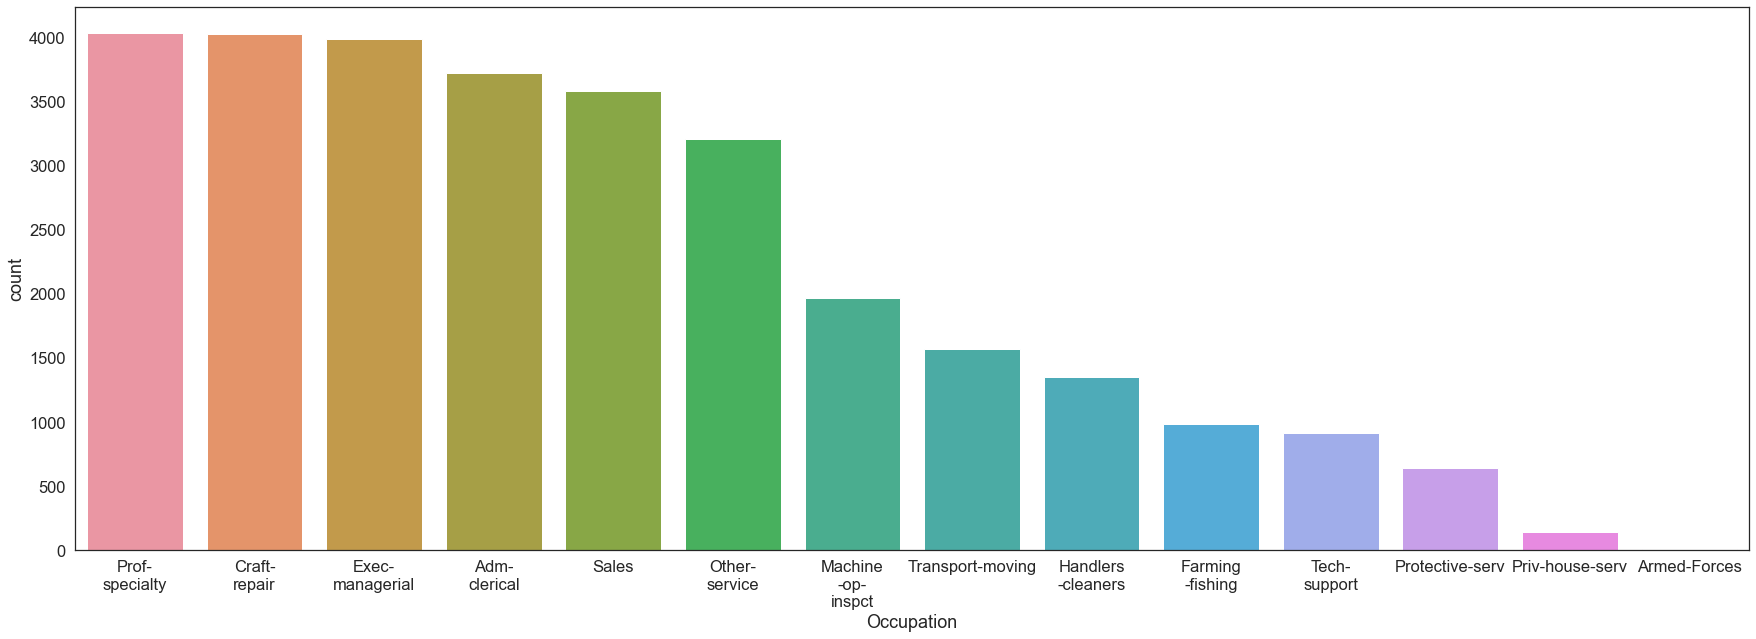

In [38]:
occ = df.loc[:,['Occupation']]
sns.countplot(x='Occupation', data = occ, order = occ['Occupation'].value_counts().index)

## RESEARCH QUESTION 4:
### What is the ratio of people earning >50k/year and <=50k/year by sex?
I will conduct this in two seperate graphs by first focusing on people who manke above 50k/year and in the second graph I will focus on those earning <=50k/year.
### Results:
The graphs show that this dataset shows a majority of men that were surveyed. In the first half of the data, men just about sextuple the women in earning above 50k/year. The ratio of high earners/low earners of each sex is about
6100/14000 = 44% of men are high earners where 1000/8000 = 12.5% of women are high earners.

[Text(0, 0.5, 'Number of People who Make\n >50K/year')]

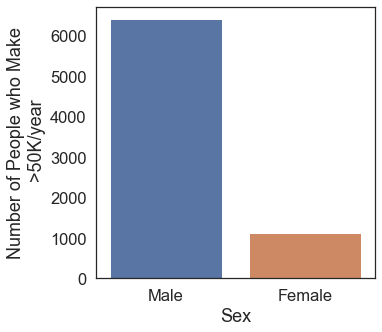

In [73]:
earnSex = df.loc[:,['Sex', 'Yearly Income']]
earnSexAbove50k = earnSex.loc[lambda x: x['Yearly Income'] == '>50K']
plt.figure(figsize=(5,5))
graph = sns.countplot(data = earnSexAbove50k, x = 'Sex')
graph.set(ylabel = 'Number of People who Make\n >50K/year')

[Text(0, 0.5, 'Number of People who Make\n <=50K/year')]

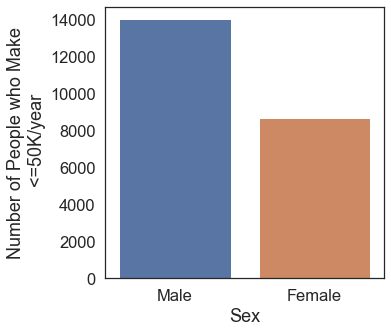

In [72]:
earnSexBelow50k = earnSex.loc[lambda x: x['Yearly Income'] == '<=50K']
plt.figure(figsize=(5,5))
graph = sns.countplot(data = earnSexBelow50k, x = 'Sex')
graph.set(ylabel = 'Number of People who Make\n <=50K/year')

In [68]:
#replace some values so they fit on graph
df.replace({'Married-civ-spouse':'Married\n-civ-\nspouse', 'Never-married':'Never-\nMarried',
            'Married-spouse-absent':'Married\n-spouse\n-absent','Married-AF-spouse':'Married\n-AF-\nspouse'}, inplace = True)
df

,Age,Workclass,Education,Marital Status,Occupation,Race,Sex,Hours/Week,Native Country,Yearly Income
0,39,State-gov,Bachelors,Never-\nMarried,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married\n-civ-\nspouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married\n-civ-\nspouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married\n-civ-\nspouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc\n-acdm,Married\n-civ-\nspouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married\n-civ-\nspouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-\nMarried,Adm-clerical,White,Male,20,United-States,<=50K


## RESEARCH QUESTION 5:
### What is the relationship of yearly earnings and marital status?
I will conduct this through splitting the data into the top earners and low earners (>50K/year,<=50K/year) and comparing them to their marital status.
### Results
People who are married are most likely to make over 50k/year while people who have never married top the charts for below 50k/year.

Text(0, 0.5, 'Number of Top Earners\nby Marital Status')

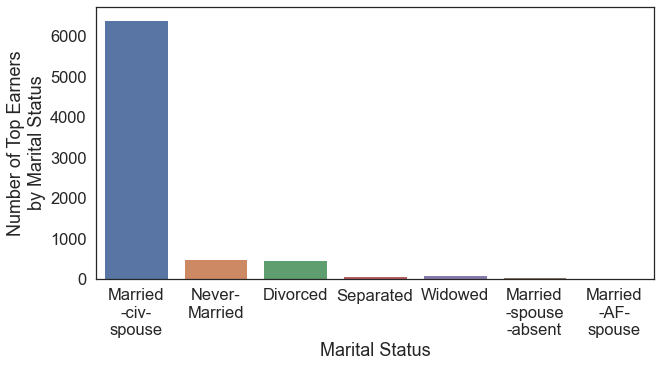

In [76]:
earnMar = df.loc[:,['Yearly Income', 'Marital Status']]
earnMarAbove50k = earnMar.loc[lambda x: x['Yearly Income'] == '>50K']
plt.figure(figsize= (10,5))
graph = sns.countplot(data = earnMarAbove50k, x = 'Marital Status')
graph.set_ylabel('Number of Top Earners\nby Marital Status')

Text(0, 0.5, 'Number of Low Earners\nby Marital Status')

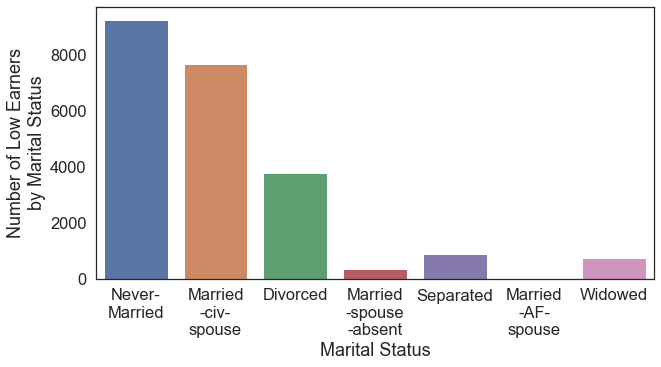

In [80]:
earnMarBelow50k = earnMar.loc[lambda x: x['Yearly Income'] == '<=50K']
plt.figure(figsize= (10,5))
graph = sns.countplot(data = earnMarBelow50k, x = 'Marital Status')
graph.set_ylabel('Number of Low Earners\nby Marital Status')